# 01-02 : Combine Datasets

Combine the datasets and perform basic EDA

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Load

In [2]:
# load the raw datasets retrieved fom hellopeter
vodacom_reviews = pd.read_parquet('../../data/raw/vodacom.parquet.gz')
mtn_reviews = pd.read_parquet('../../data/raw/mtn.parquet.gz')
telkom_reviews = pd.read_parquet('../../data/raw/telkom.parquet.gz')
cell_c_reviews = pd.read_parquet('../../data/raw/cell_c.parquet.gz')
rain_reviews = pd.read_parquet('../../data/raw/rain_internet_service_provider.parquet.gz')

In [3]:
# show the shape of each dataset
print(f'vodacom_reviews : {vodacom_reviews.shape}')
print(f'mtn_reviews     : {mtn_reviews.shape}')
print(f'telkom_reviews  : {telkom_reviews.shape}')
print(f'cell_c_reviews  : {cell_c_reviews.shape}')
print(f'rain_reviews    : {rain_reviews.shape}')

vodacom_reviews : (30352, 28)
mtn_reviews     : (19321, 28)
telkom_reviews  : (15332, 28)
cell_c_reviews  : (12351, 28)
rain_reviews    : (16524, 28)


## Data Merge

In [4]:
df_reviews = pd.concat([vodacom_reviews, mtn_reviews, telkom_reviews, cell_c_reviews, rain_reviews])

print(df_reviews.shape)
display(df_reviews.head())

(93880, 28)


,id,user_id,created_at,authorDisplayName,author,authorAvatar,author_id,review_title,review_rating,review_content,...,industry_slug,status_id,nps_rating,source,is_reported,business_reporting,author_created_date,author_total_reviews_count,attachments,business
0,4527127,320a79a8-31fa-11e8-83f4-f23c91bb6188,2023-07-24 14:01:29,Simphiwe N,Simphiwe N,,320a79a8-31fa-11e8-83f4-f23c91bb6188,Out of bundle data eating up my airtime even a...,1,Out of bundle services stopped working after I...,...,telecommunications,1,NaN,WEBSITE,False,None,2017-01-13,20,[],vodacom
1,4527105,6a44e350-9c25-11ea-9513-4b6a247180c8,2023-07-24 13:53:40,erika H,erika H,,6a44e350-9c25-11ea-9513-4b6a247180c8,worst service - Vodacom.,1,I have been a customer of Vodacom for more tha...,...,telecommunications,1,NaN,WEBSITE,False,None,2020-05-22,3,[],vodacom
2,4526994,2ad8a520-811e-11ed-9e3d-2143ef18dbd4,2023-07-24 13:10:31,Eulanda M,Eulanda M,,2ad8a520-811e-11ed-9e3d-2143ef18dbd4,Cancel Vodacom contract please. 😒,1,Now that Vodacom com collected the router. No...,...,telecommunications,1,NaN,WEBSITE,False,None,2022-12-21,2,[],vodacom
3,4526951,64e8c6c0-1999-11ee-90b2-919230383f47,2023-07-24 12:56:45,Elizabeth S,Elizabeth S,,64e8c6c0-1999-11ee-90b2-919230383f47,Refund taking forever - customer service poor,1,Customer service very poor at Vodacom . Refund...,...,telecommunications,1,NaN,WEBSITE,False,None,2023-07-03,5,[],vodacom
4,4526886,1901e30a-31fa-11e8-83f4-f23c91bb6188,2023-07-24 12:34:38,Stephanus,Stephanus,,1901e30a-31fa-11e8-83f4-f23c91bb6188,Vodacom-Secure encryted login,1,"No one at Vodacom can explain ""Secure encrypte...",...,telecommunications,1,NaN,WEBSITE,False,None,2014-02-17,3,[],vodacom


## Exploratory Data Analysis

In [18]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93880 entries, 0 to 16523
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          93880 non-null  int64         
 1   user_id                     93879 non-null  object        
 2   created_at                  93880 non-null  datetime64[ns]
 3   authorDisplayName           93880 non-null  object        
 4   author                      93880 non-null  object        
 5   authorAvatar                93880 non-null  object        
 6   author_id                   93879 non-null  object        
 7   review_title                93880 non-null  object        
 8   review_rating               93880 non-null  int64         
 9   review_content              93880 non-null  object        
 10  business_name               93880 non-null  object        
 11  business_slug               93880 non-null  object        


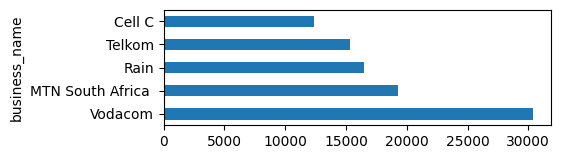

In [17]:
df_reviews.business_name.value_counts().plot(kind='barh', figsize=(5, 1.5))
plt.show()

## Save Data

In [20]:
df_reviews.to_parquet('../../data/interim/01-02_reviews.parquet.gz', compression='gzip')